#### Two dimensional nonlinear model
$$
\begin{align*}
x_{n+1}=x_n +\eta F(\alpha_n) x_n +\sqrt{\eta} \sigma(\alpha_n)w_n \\
y_{n+1}=y_n +\eta G(\alpha_n) x_n +\sqrt{\eta} \sigma_1 v_n
\end{align*}
$$

In [82]:
import Ex2_loader
import Ex2_generator
import numpy as np
import sys
sys.path.append('..')
import nn_DF
import matplotlib.pyplot as plt
%load_ext autoreload
%autoreload 2
%matplotlib inline
%config InlineBackend.figure_format='svg'
from sklearn.metrics import mean_squared_error

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [83]:
PATH_TRAIN='../datas/Ex2Train.pklz'

x0=np.array([[1],[-1]]); 

dimX=2; N=100; n0=10; eta=0.04; dimY=2

training_data, validation_data, test_data,\
data_mean, data_std, label_mean, label_std=Ex2_loader.load_data_wrapper(PATH_TRAIN)
# Prepare test data to predict
test_data_data=[x for x,y in test_data]
test_data_label=[y for x,y in test_data]
test_data_label=np.array(test_data_label)
test_data_label=test_data_label.reshape(len(test_data_label),2)
len(training_data)

16956

### Build network

In [84]:
# The num of first layer is n0*dimY, the num of last layer is dimX.
net=nn_DF.Network([n0*dimY, 32, 16, 8, 8, dimX])
epoch=200

In [85]:
tcMSE_EpochAdalr1, tcRel_EpochAdalr1, ecMSE_EpochAdalr1, ecRel_EpochAdalr1, w_EpochAdalr1, b_EpochAdalr1, EpochAdalr1\
=net.SGD_EpochAdalr(training_data, epoch, 64, 0.001, 0.001, 0.01, monitor_cost=True,evaluation_data=validation_data)
tcMSE_EpochAdalr5, tcRel_EpochAdalr5, ecMSE_EpochAdalr5, ecRel_EpochAdalr5, w_EpochAdalr5, b_EpochAdalr5, EpochAdalr5\
=net.SGD_EpochAdalr(training_data, epoch, 64, 0.005, 0.001, 0.01, monitor_cost=True,evaluation_data=validation_data)
tcMSE_EpochAdalr10, tcRel_EpochAdalr10, ecMSE_EpochAdalr10, ecRel_EpochAdalr10, w_EpochAdalr10, b_EpochAdalr10, EpochAdalr10\
=net.SGD_EpochAdalr(training_data, epoch, 64, 0.01, 0.001, 0.01, monitor_cost=True,evaluation_data=validation_data)

-----------------------------
Epoch Adaptive lr begins.
Initial eta is: 0.001
The eta of Epoch 0 is 0.0008943084472391774
Epoch 0: 0.884749925019531
The eta of Epoch 1 is 0.0007333611729856323
Epoch 1: 0.6504513398825
The eta of Epoch 2 is 0.0009264863525756692
Epoch 2: 0.48668634676963113
The eta of Epoch 3 is 0.0010926111755326171
Epoch 3: 0.34929977869610623
The eta of Epoch 4 is 0.0011385406948534467
Epoch 4: 0.26312992568786814
The eta of Epoch 5 is 0.0011704313583005797
Epoch 5: 0.2287242235002615
The eta of Epoch 6 is 0.0011622321481121142
Epoch 6: 0.21207187359762522
The eta of Epoch 7 is 0.0011448657102612427
Epoch 7: 0.20566176555385235
The eta of Epoch 8 is 0.0011485242146600358
Epoch 8: 0.20175800894735307
The eta of Epoch 9 is 0.0012025003170550907
Epoch 9: 0.19919974184283068
The eta of Epoch 10 is 0.0012508571174959814
Epoch 10: 0.19575061289052115
The eta of Epoch 11 is 0.0013620684110332466
Epoch 11: 0.19342728523087102
The eta of Epoch 12 is 0.0013357396122173134
Epoc

In [86]:
tcMSE_constlr1, tcRel_constlr1, ecMSE_constlr1, ecRel_constlr1, w_constlr1, b_constlr1,constlr1\
=net.SGD_Constlr(training_data, epoch, 64, 0.001, evaluation_data=validation_data)
tcMSE_constlr5,tcRel_constlr5, ecMSE_constlr5,ecRel_constlr5, w_constlr5, b_constlr5, constlr5\
=net.SGD_Constlr(training_data, epoch, 64, 0.005, evaluation_data=validation_data)
tcMSE_constlr10, tcRel_constlr10, ecMSE_constlr10,ecRel_constlr10, w_constlr10, b_constlr10, constlr10\
=net.SGD_Constlr(training_data, epoch, 64, 0.01, evaluation_data=validation_data)

-----------------------------
Constant learning rate begins.
Initial eta is: 0.001
The eta of Epoch 0 is 0.001
Epoch 0: 0.8681855097932452
The eta of Epoch 1 is 0.001
Epoch 1: 0.613569924278931
The eta of Epoch 2 is 0.001
Epoch 2: 0.4211451585604303
The eta of Epoch 3 is 0.001
Epoch 3: 0.3000552903760239
The eta of Epoch 4 is 0.001
Epoch 4: 0.24963782374826787
The eta of Epoch 5 is 0.001
Epoch 5: 0.22398248348087432
The eta of Epoch 6 is 0.001
Epoch 6: 0.212175058658692
The eta of Epoch 7 is 0.001
Epoch 7: 0.2071350574386373
The eta of Epoch 8 is 0.001
Epoch 8: 0.2044454567692565
The eta of Epoch 9 is 0.001
Epoch 9: 0.19944207418079002
The eta of Epoch 10 is 0.001
Epoch 10: 0.19652419149237335
The eta of Epoch 11 is 0.001
Epoch 11: 0.1938068953457729
The eta of Epoch 12 is 0.001
Epoch 12: 0.19219537409707144
The eta of Epoch 13 is 0.001
Epoch 13: 0.1889502557206135
The eta of Epoch 14 is 0.001
Epoch 14: 0.1910826970691594
The eta of Epoch 15 is 0.001
Epoch 15: 0.18590485375113577
The e

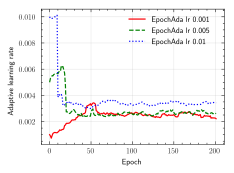

In [194]:
epochs=np.linspace(0,epoch+1,epoch+1)
plt.style.reload_library()
with plt.style.context(['science.mplstyle','ieee.mplstyle']):
    plt.plot(epochs,EpochAdalr1,'#FB0006', epochs, EpochAdalr5, 'g', epochs, EpochAdalr10,'b', linewidth=1.2)
    plt.grid(alpha=0.35)
    plt.legend(["EpochAda lr 0.001","EpochAda lr 0.005","EpochAda lr 0.01"],edgecolor="black")
    plt.xlabel("Epoch")
    plt.ylabel("Adaptive learning rate")
plt.savefig("../img/Ex2-lr.pdf", dpi=600,bbox_inches = 'tight')

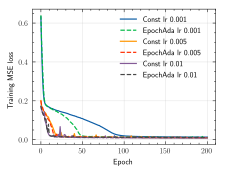

In [195]:
Epochs=np.linspace(0,epoch,epoch)
plt.style.reload_library()
with plt.style.context(['science.mplstyle','ieee.mplstyle','std-colors.mplstyle']):
     plt.plot(Epochs, tcMSE_constlr1, Epochs, tcMSE_EpochAdalr1,"--", Epochs, tcMSE_constlr5,\
     Epochs,tcMSE_EpochAdalr5,'--',Epochs, tcMSE_constlr10,Epochs,tcMSE_EpochAdalr10,'--',linewidth=1.2) 
     plt.grid(alpha=0.35)   
     plt.legend(["Const lr 0.001","EpochAda lr 0.001","Const lr 0.005","EpochAda lr 0.005","Const lr 0.01","EpochAda lr 0.01"],edgecolor="black")
     plt.xlabel("Epoch")
     plt.ylabel("Training MSE loss")
    
plt.savefig("../img/Ex2-loss.pdf", dpi=600,bbox_inches = 'tight')

In [199]:
def relative_err(y_true, y_pred):
    """Compute Relative Error"""
    abs_sum=np.sum(np.abs(y_true-y_pred))
    return abs_sum/(np.sum(np.abs(y_true))+np.sum(np.abs(y_pred)))

def ComputeError(pred, label, label_mean, label_std, dimX):
    pred=np.array(pred)
    pred=pred.reshape(len(pred),dimX)
    for k in range(len(pred)):
        pred[k,:]=pred[k,:]*label_std+label_mean
    RelErr=relative_err(pred, label)
    mseErr=mean_squared_error(pred, label)
    return (mseErr, RelErr)

In [100]:
N_sample=256
P= np.array([[0.98,0.02],[0.02,0.98]])

TotalDatas=[]; TotalLabels=np.zeros(((N-n0+2)*N_sample,dimX))
for i in range(256):
    alpha=Ex2_generator.mChain(N,P)
    datas1, labels1, x_new1=Ex2_generator.generate_new_data(data_mean, data_std,alpha)
    TotalDatas.extend(datas1)
    x_new1=x_new1[n0-1:]
    TotalLabels[i*(N-n0+2):(i+1)*(N-n0+2)]=x_new1

In [205]:
NewPred_EpochAdalr1=net.predict(TotalDatas, w_EpochAdalr1, b_EpochAdalr1, label=False)
NewPred_EpochAdalr5=net.predict(TotalDatas, w_EpochAdalr5, b_EpochAdalr5, label=False)
NewPred_EpochAdalr10=net.predict(TotalDatas, w_EpochAdalr10, b_EpochAdalr10, label=False)

ErrEpochAdalr1=ComputeError(NewPred_EpochAdalr1, TotalLabels, label_mean, label_std, dimX)
ErrEpochAdalr5=ComputeError(NewPred_EpochAdalr5, TotalLabels, label_mean, label_std, dimX)
ErrEpochAdalr10=ComputeError(NewPred_EpochAdalr10, TotalLabels, label_mean, label_std, dimX)

print('>>> relative error for initial lr 0.001 is ' + str(ErrEpochAdalr1[1]))
print('>>> relative error for initial lr 0.005 is ' + str(ErrEpochAdalr5[1]))
print('>>> relative error for initial lr 0.01 is ' + str(ErrEpochAdalr10[1]))

>>> relative error for initial lr 0.001 is 0.10901795054138097
>>> relative error for initial lr 0.005 is 0.10837149707593523
>>> relative error for initial lr 0.01 is 0.11297307886040509


In [182]:
np.random.seed(8)
ru=np.random.uniform(0,1,size=N)
P= np.array([[0.98,0.02],[0.02,0.98]])
alpha=Ex2_generator.mChain(N,P,ru)

datas, labels, x_new =Ex2_generator.generate_new_data(data_mean, data_std, alpha)

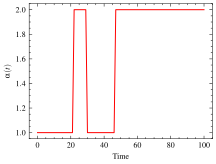

In [206]:
plt.style.reload_library()
with plt.style.context(['science','ieee']):
    plt.plot(alpha,'r')
    plt.xlabel("Time")
    plt.ylabel(r'$ \alpha (t) $')
    plt.show()
# plt.savefig("../img/ex2-alpha.pdf", dpi=600,bbox_inches = 'tight')

In [96]:
tcMSE_constlr, tcRel_constlr, ecMSE_constlr, ecRel_constlr, w_constlr, b_constlr, constlr\
=net.SGD_Constlr(training_data, epoch, 64, 0.003, evaluation_data=validation_data)
tcMSE_EpochAdalr, tcRel_EpochAdalr, ecMSE_EpochAdalr, ecRel_EpochAdalr, w_EpochAdalr, b_EpochAdalr, EpochAdalr\
=net.SGD_EpochAdalr(training_data, epoch, 64, 0.003, 0.001, 0.01, evaluation_data=validation_data)

-----------------------------
Constant learning rate begins.
Initial eta is: 0.003
The eta of Epoch 0 is 0.003
Epoch 0: 0.43413108096978165
The eta of Epoch 1 is 0.003
Epoch 1: 0.22552713747028408
The eta of Epoch 2 is 0.003
Epoch 2: 0.2046325396064665
The eta of Epoch 3 is 0.003
Epoch 3: 0.1938561700966058
The eta of Epoch 4 is 0.003
Epoch 4: 0.18706025939387602
The eta of Epoch 5 is 0.003
Epoch 5: 0.17948248624913685
The eta of Epoch 6 is 0.003
Epoch 6: 0.17427616760654546
The eta of Epoch 7 is 0.003
Epoch 7: 0.16920184903098837
The eta of Epoch 8 is 0.003
Epoch 8: 0.1658148046924372
The eta of Epoch 9 is 0.003
Epoch 9: 0.15992374476812635
The eta of Epoch 10 is 0.003
Epoch 10: 0.15467424259243892
The eta of Epoch 11 is 0.003
Epoch 11: 0.14870128710846198
The eta of Epoch 12 is 0.003
Epoch 12: 0.14271259487805946
The eta of Epoch 13 is 0.003
Epoch 13: 0.1363875309328288
The eta of Epoch 14 is 0.003
Epoch 14: 0.1307862210384527
The eta of Epoch 15 is 0.003
Epoch 15: 0.1229079981828419

In [183]:
pr_const=net.predict(datas,w_constlr, b_constlr,label=False)
pr_const=np.array(pr_const)
pr_const=pr_const.reshape(len(pr_const),dimX)
for k in range(N-n0+2):
    pr_const[k,:]=pr_const[k,:]*label_std+label_mean
    
const_new=[x0 for k in range(n0-1)]
const_new=np.array(const_new)
const_new=const_new.reshape(n0-1,dimX)
const_new=np.vstack((const_new,pr_const))

In [184]:
pr_ada=net.predict(datas,w_EpochAdalr, b_EpochAdalr,label=False)
pr_ada=np.array(pr_ada)
pr_ada=pr_ada.reshape(len(pr_ada),dimX)
for k in range(N-n0+2):
    pr_ada[k,:]=pr_ada[k,:]*label_std+label_mean
ada_new=[x0 for k in range(n0-1)]
ada_new=np.array(ada_new)
ada_new=ada_new.reshape(n0-1,dimX)
ada_new=np.vstack((ada_new,pr_ada))

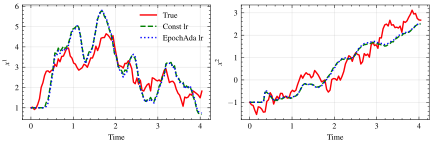

<Figure size 432x288 with 0 Axes>

In [196]:
axis=np.linspace(0,eta*(N+1),N+1)
plt.style.reload_library()
with plt.style.context(['science.mplstyle','ieee.mplstyle']):
    fig, ax=plt.subplots(1,2, figsize=(6,2),constrained_layout=True)
    ax[0].plot(axis,x_new[:,0],'#FB0006',axis,const_new[:,0],'g',axis, ada_new[:,0],'b',linewidth=1.4)
    ax[0].minorticks_on()
    ax[0].set_xlabel('Time'); ax[0].set_ylabel('$x^1$')
    ax[0].grid(alpha=0.35)

    ax[1].plot(axis, x_new[:,1],'#FB0006', axis, const_new[:,1], 'g', axis, ada_new[:,1],'b', linewidth=1.4)
    ax[1].minorticks_on()
    ax[1].set_xlabel('Time'); ax[1].set_ylabel('$x^2$')

    ax[1].grid(alpha=0.35)
    ax[0].legend(["True","Const lr","EpochAda lr"],prop={'size':8},edgecolor="black")
    
# plt.savefig("../img/Ex2-path.pdf", dpi=600,bbox_inches = 'tight')